In [1]:
import torch
from model_arc import BallPolicy
torch.mps.current_allocated_memory()

0

In [86]:
torch.mps.profiler

0.5937803005817712

In [2]:
torch.mps.driver_allocated_memory()

425984

In [31]:
# model = torch.jit.load("ball_policy.pt", map_location=torch.device('cpu'))
n_balls = 50
nb_features=4
in_f = (n_balls + 1) * nb_features
model = BallPolicy(n_balls = n_balls, nb_features=nb_features, n_actions=4, n_layers=2)
model = model.to('mps')

In [72]:
model = model.to('cpu')

In [61]:
from time import time

batch_size = 32
t = time()
optim = torch.optim.Adam(model.parameters(), lr=1e-8)
data = torch.rand(batch_size, in_f).to('mps')
# for _ in range(60):
loss = model(data).sum()
# print(loss)
loss.backward()
optim.step()
delta  = time() - t
print(delta)

0.01472163200378418


In [63]:
256 ** 2

65536

In [62]:
optim = torch.optim.Adam(model.parameters(), lr=1e-8)
data = torch.rand(1, 1004).to('cpu') * 1000000000
loss = model(data).sum()
print(loss)

tensor(0.8145, grad_fn=<SumBackward0>)


In [73]:
print(data)

tensor([[0.1607, 0.6558, 0.1795, 0.6435, 0.5817, 0.7773, 0.2754, 0.6279, 0.4268,
         0.3380, 0.9985, 0.3087, 0.1169, 0.9919, 0.7456, 0.4179, 0.7269, 0.7882,
         0.9452, 0.9267, 0.2000, 0.3957, 0.0325, 0.5733, 0.0043, 0.4618, 0.9501,
         0.1934, 0.1906, 0.1742, 0.9788, 0.5099, 0.8030, 0.1362, 0.8860, 0.6982,
         0.9043, 0.7401, 0.8275, 0.8636, 0.0550, 0.0833, 0.5711, 0.4348, 0.2975,
         0.4235, 0.3399, 0.9667, 0.2835, 0.1916, 0.7493, 0.8560, 0.4503, 0.9696,
         0.4613, 0.9016, 0.8486, 0.0912, 0.4481, 0.9865, 0.5720, 0.9743, 0.7210,
         0.0758, 0.0845, 0.2558, 0.9505, 0.7565, 0.6046, 0.4338, 0.9569, 0.7902,
         0.8656, 0.6070, 0.8447, 0.1914, 0.0463, 0.2863, 0.8697, 0.5480, 0.0542,
         0.0481, 0.6061, 0.9848, 0.0304, 0.7185, 0.7259, 0.9627, 0.4677, 0.3502,
         0.8991, 0.4367, 0.4507, 0.2996, 0.7822, 0.1324, 0.6747, 0.9638, 0.4812,
         0.2542, 0.5442, 0.2416, 0.6191, 0.5733, 0.3336, 0.5777, 0.9326, 0.9300,
         0.5902, 0.6570, 0.5

In [48]:
model(data)

tensor([[-0.0254,  0.0652,  0.0072,  0.0306]], device='mps:0',
       grad_fn=<DifferentiableGraphBackward>)

In [2]:
import numpy as np
import torch

def parse_simulation_output(file_path):
    # Initialize containers for data
    class_labels = []
    positions = []

    # Open and read the file
    with open(file_path, 'r') as f:
        current_class = None
        current_positions = []

        for line in f:
            line = line.strip()

            # Skip empty lines
            if not line or line == '---':
                continue

            # Check for class identifier
            if line.startswith('Class:'):
                # If we're already processing a class, save its positions and reset
                if current_class is not None and current_positions:
                    class_labels.append(current_class)
                    positions.append(current_positions)

                # Extract the class name (i.e., 'Red', 'Green', etc.)
                current_class = line.split(': ')[1]
                current_positions = []
            else:
                # Split the position into x, y floats
                x, y = map(float, line.split(','))
                current_positions.append([x, y])

        # Don't forget to add the last class after the loop ends
        if current_class is not None and current_positions:
            class_labels.append(current_class)
            positions.append(current_positions)

    return class_labels, positions

def positions_to_tensor_or_numpy(positions, use_tensor=True):
    """
    Convert the list of positions into a tensor (default) or numpy array.
    
    :param positions: List of position data.
    :param use_tensor: Boolean flag to decide whether to convert to a tensor or numpy array.
    :return: Tensor or NumPy array of shape (num_balls, num_frames, 2).
    """
    # Convert positions into a 3D array (num_balls, num_frames, 2)
    data_array = np.array(positions)  # Shape: (num_balls, num_frames, 2)

    if use_tensor:
        return torch.tensor(data_array, dtype=torch.float32)
    else:
        return data_array

# Example usage
file_path = "../../ball_positions.txt"  # Change this to the path of your file

# Parse the file
class_labels, positions = parse_simulation_output(file_path)

# Convert to tensor or numpy array
use_tensor = True  # Set to False if you want a NumPy array instead of a tensor
output = positions_to_tensor_or_numpy(positions, use_tensor=use_tensor)

print("Class labels:", class_labels)
print("Data shape:", output.shape)  # Should print something like (num_balls, num_frames, 2)
print("First ball's positions:", output[0])  # Example to see positions of the first ball


Class labels: ['Red', 'Green', 'Blue', 'Yellow', 'Green', 'Blue', 'Red', 'Blue', 'Blue', 'Red', 'Green', 'Red', 'Blue', 'Blue', 'Yellow', 'Yellow', 'Yellow', 'Green', 'Red', 'Green', 'Blue', 'Red', 'Yellow', 'Blue', 'Player', 'Yellow', 'Green', 'Blue', 'Blue', 'Yellow', 'Red', 'Yellow', 'Blue', 'Blue', 'Green', 'Green', 'Yellow', 'Red', 'Green', 'Blue', 'Yellow', 'Red', 'Blue', 'Yellow', 'Blue', 'Yellow', 'Yellow', 'Green', 'Green', 'Blue', 'Red']
Data shape: torch.Size([51, 46, 2])
First ball's positions: tensor([[6.1928, 4.2430],
        [6.1928, 4.2430],
        [6.1545, 4.2594],
        [6.1253, 4.2720],
        [6.1030, 4.2815],
        [6.0859, 4.2889],
        [6.0752, 4.2934],
        [6.0647, 4.2980],
        [6.0567, 4.3014],
        [6.0504, 4.3043],
        [6.0453, 4.3066],
        [6.0413, 4.3085],
        [6.0380, 4.3100],
        [6.0354, 4.3112],
        [6.0332, 4.3122],
        [6.0314, 4.3130],
        [6.0300, 4.3137],
        [6.0288, 4.3142],
        [6.0278, 4.3

In [13]:
for positions in output.permute(1, 0, 2):
    print(positions.shape)

torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])
torch.Size([51, 2])


In [ ]:
import ipywidgets as widgets
from IPython.display import display

import matplotlib.pyplot as plt

# Dictionary to map class labels to colors
color_map = {
    'Red': 'r',
    'Green': 'g',
    'Blue': 'b',
    'Yellow': 'y',
    'Player': 'w'
}

# Function to plot the positions for a given frame
def plot_frame(frame):
    positions = output[:, frame].numpy()

    # Create a new figure
    plt.figure(figsize=(5, 5))

    # Iterate over positions and plot each as a circle
    for pos, label in zip(positions, class_labels):
        color = color_map.get(label, 'k')  # Default to black if class is unknown
        circle = plt.Circle((pos[0], pos[1]), 1.5 if label == 'Player' else 0.5, color=color, alpha=0.5)
        plt.gca().add_patch(circle)

    # Set the limits and aspect ratio
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().set_facecolor('gray')

    # Add grid and title
    plt.grid(True)
    plt.title(f"2D Rendering of Circles Based on Positions (Frame {frame})")

    # Show the plot
    plt.show()

# Create an interactive slider
frame_slider = widgets.IntSlider(min=0, max=output.shape[1] - 1, step=1, value=0, description='Frame:')
widgets.interact(plot_frame, frame=frame_slider)

# Display the slider
# display(frame_slider)




In [7]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Function to plot the positions for a given frame
def plot_frame(frame, ax):
    ax.clear()
    positions = output[:, frame].numpy()

    # Iterate over positions and plot each as a circle
    for pos, label in zip(positions, class_labels):
        color = color_map.get(label, 'k')  # Default to black if class is unknown
        circle = plt.Circle((pos[0], pos[1]), 1.5 if label == 'Player' else 0.5, color=color, alpha=0.5)
        ax.add_patch(circle)

    # Set the limits and aspect ratio
    ax.set_xlim(-25, 25)
    ax.set_ylim(-25, 25)
    ax.set_aspect('equal', adjustable='box')
    ax.set_facecolor('gray')

    # Add grid and title
    ax.grid(True)
    ax.set_title(f"2D Rendering of Circles Based on Positions (Frame {frame})")

# Function to create and save the animation
def create_animation(output, class_labels, color_map, filename='animation.mp4', fps=25):
    fig, ax = plt.subplots(figsize=(5, 5))

    # Create the animation
    ani = animation.FuncAnimation(fig, plot_frame, frames=output.shape[1], fargs=(ax,), repeat=False)

    # Save the animation as an MP4 file
    ani.save(filename, writer='ffmpeg', fps=fps)

    plt.close(fig)

# Example usage
create_animation(output, class_labels, color_map)


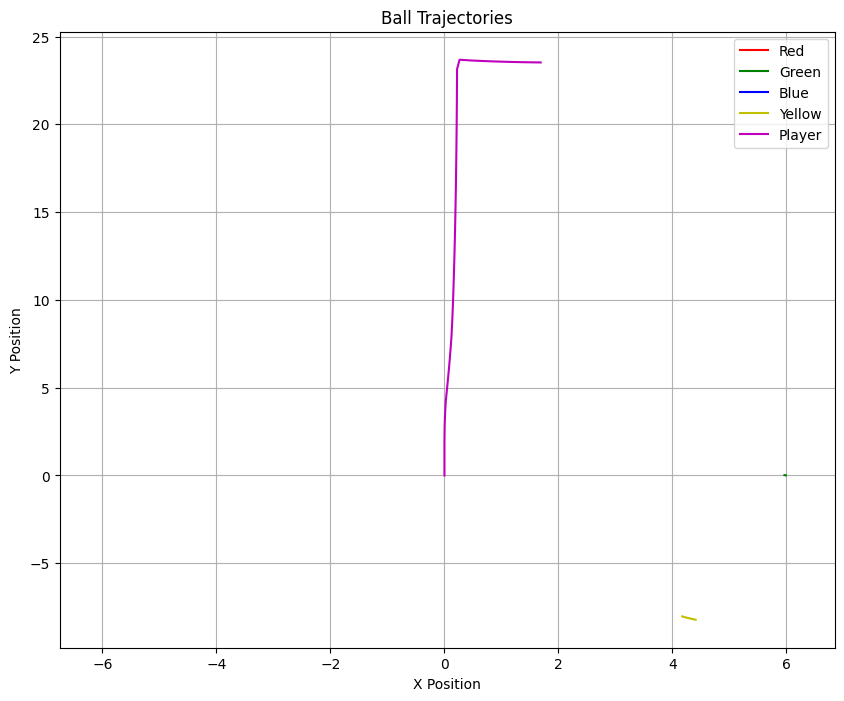

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Dictionary to map class labels to colors
color_map = {
    'Red': 'r',
    'Green': 'g',
    'Blue': 'b',
    'Yellow': 'y',
    'Player': 'm'
}

def parse_simulation_data(file_content):
    data = {}
    current_class = None

    for line in file_content.strip().split("\n"):
        line = line.strip()
        if not line or line == '---':
            continue
        if line.startswith("Class:"):
            current_class = line.split(":")[1].strip()
            data[current_class] = {'x': [], 'y': []}
        else:
            # Parse position data
            x, y = map(float, line.split(","))
            data[current_class]['x'].append(x)
            data[current_class]['y'].append(y)

    return data

def plot_ball_trajectories(data):
    plt.figure(figsize=(10, 8))

    for ball_class, positions in data.items():
        x = positions['x']
        y = positions['y']
        color = color_map.get(ball_class, 'k')  # Default to black if class is unknown
        plt.plot(x, y, label=ball_class, color=color)

    plt.title("Ball Trajectories")
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
file_path = '../../ball_positions.txt'  # Update this with the actual file path

# Read the file content
with open(file_path, 'r') as file:
    file_content = file.read()

# Parse the data and plot the trajectories
simulation_data = parse_simulation_data(file_content)
plot_ball_trajectories(simulation_data)
